In [13]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
import seaborn as sns

Histogram

In [15]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

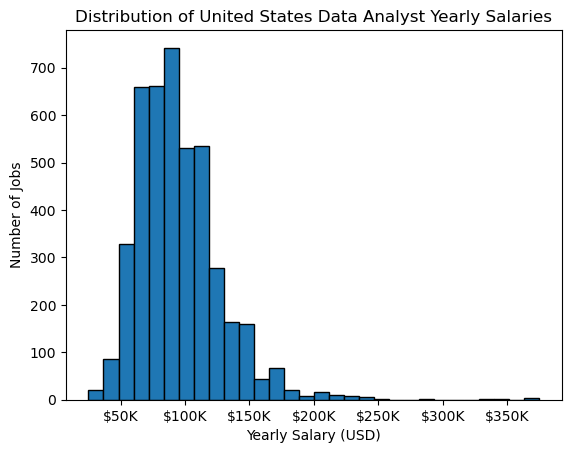

In [16]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()


Seaborn with Kernel density estimation(KDE)

In [17]:
# Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

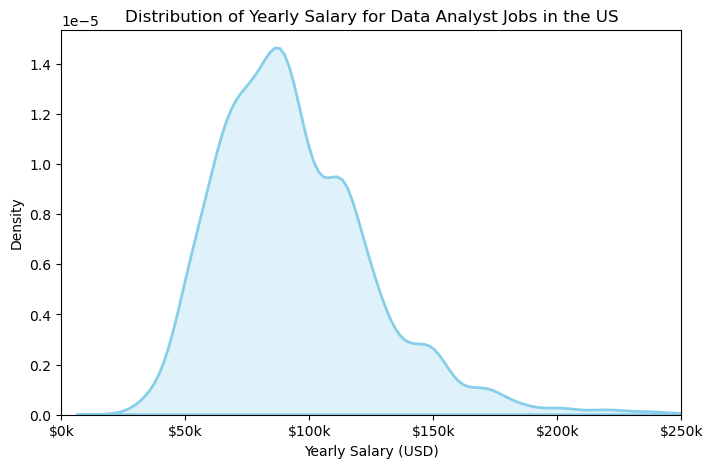

In [21]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(8, 5))

# KDE only (no histogram)
sns.kdeplot(df_DA_US['salary_year_avg'], fill=True, color="skyblue", linewidth=2)

# Title + labels
plt.title('Distribution of Yearly Salary for Data Analyst Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Density')
plt.xlim(0, 250000)

# Format x-axis as $50k, $100k...
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

plt.show()


In [23]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_counts = df_skills.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_skills_counts = skills_counts.sort_values(['skill_count'], ascending= False)


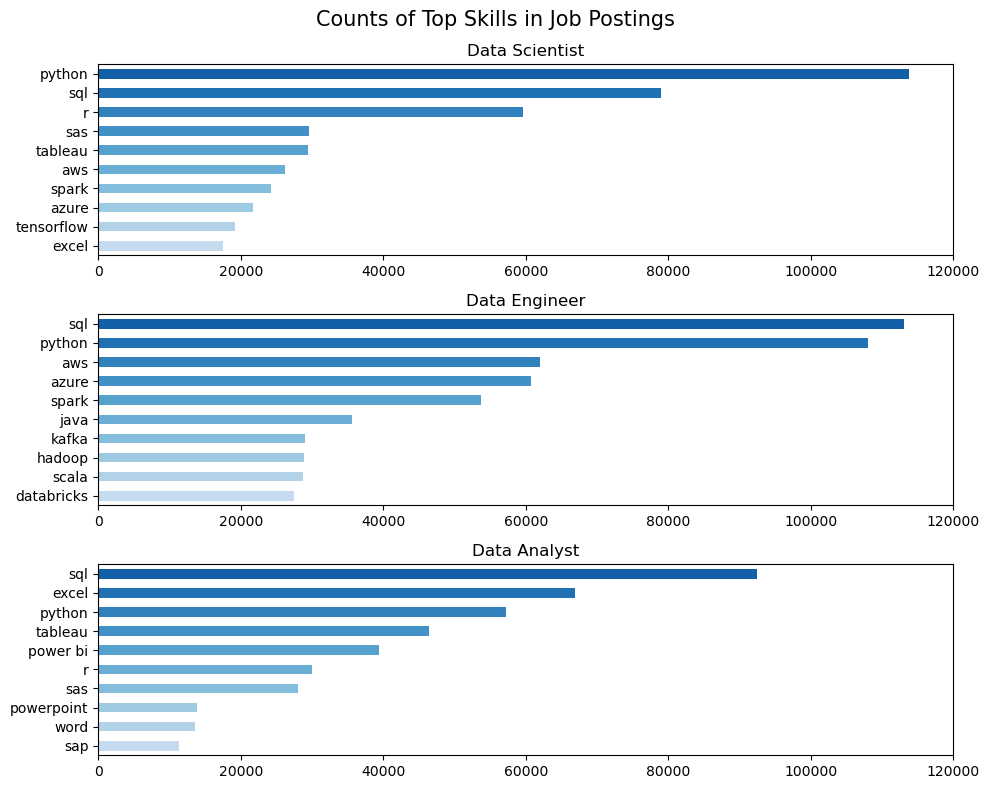

In [50]:


# get the top 3 job titles
job_titles = df_skills_counts['job_title_short'].unique().tolist()[:3]
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 8))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_counts[df_skills_counts['job_title_short'] == job_title].head(10)

    # Use only mid-to-dark range of Blues palette
    colors = sns.color_palette("Blues", n_colors=15)[3:13][::-1]

    df_plot.plot(
        kind='barh',
        x='job_skills',
        y='skill_count',
        ax=ax[i],
        title=job_title,
        color=colors
    )

    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()


In [51]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [59]:
df_business = df[df['job_title_short'] == 'Business Analyst'].copy()
# counting the number of job post for business analyst in each country along with the salary
df_business_country = df_business.groupby('job_country').agg(
    job_count=('job_title_short', 'count'),
    avg_salary_yearly=('salary_year_avg', 'median')
).reset_index().sort_values(by='job_count', ascending=False).head(10)
df_business_country

,job_country,job_count,avg_salary_yearly
141,United States,7382,90000.0
116,Singapore,1956,79200.0
58,India,1887,64800.0
104,Philippines,1725,63000.0
122,Spain,1505,86400.0
84,Mexico,1358,80850.0
80,Malaysia,1320,79200.0
63,Italy,1267,43200.0
55,Hong Kong,1261,NaN
30,Costa Rica,1229,81075.0


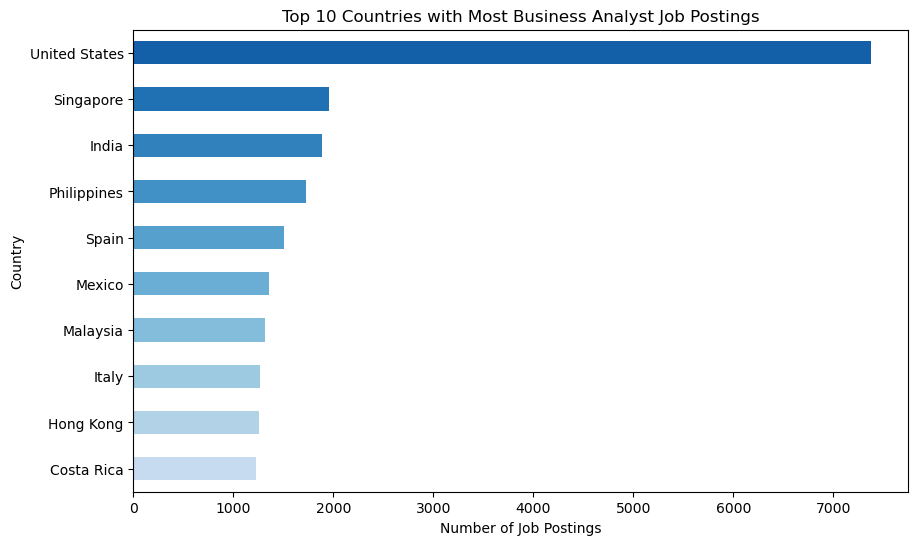

In [62]:
# plotting barchart for the top 10 countries with most business analyst jobs
fig, ax1 = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("Blues", n_colors=15)[3:13][::-1]
df_business_country.plot(
    kind='barh',
    x='job_country',
    y='job_count',
    ax=ax1,
    color=colors,
    legend=False,
    title='Top 10 Countries with Most Business Analyst Job Postings'
)
ax1.set_xlabel('Number of Job Postings')
ax1.set_ylabel('Country')
ax1.invert_yaxis()

plt.show()

In [64]:
# top 5 countries where insurance are given for data analyst job
df_DA_insurance = df[(df['job_title_short'] == 'Data Analyst') & 
                (df['job_health_insurance'] == True)].copy()
df_DA_insurance_country = (df_insurance.groupby('job_country').
                    size().
                    reset_index(name='job_count').
                    sort_values(by='job_count', ascending=False).head(10))

df_DA_insurance_country
           

,job_country,job_count
150,United States,67816
48,France,13803
149,United Kingdom,10482
50,Germany,7131
125,Singapore,6632
63,India,6121
131,Spain,5177
113,Philippines,4766
68,Italy,4543
100,Netherlands,4123


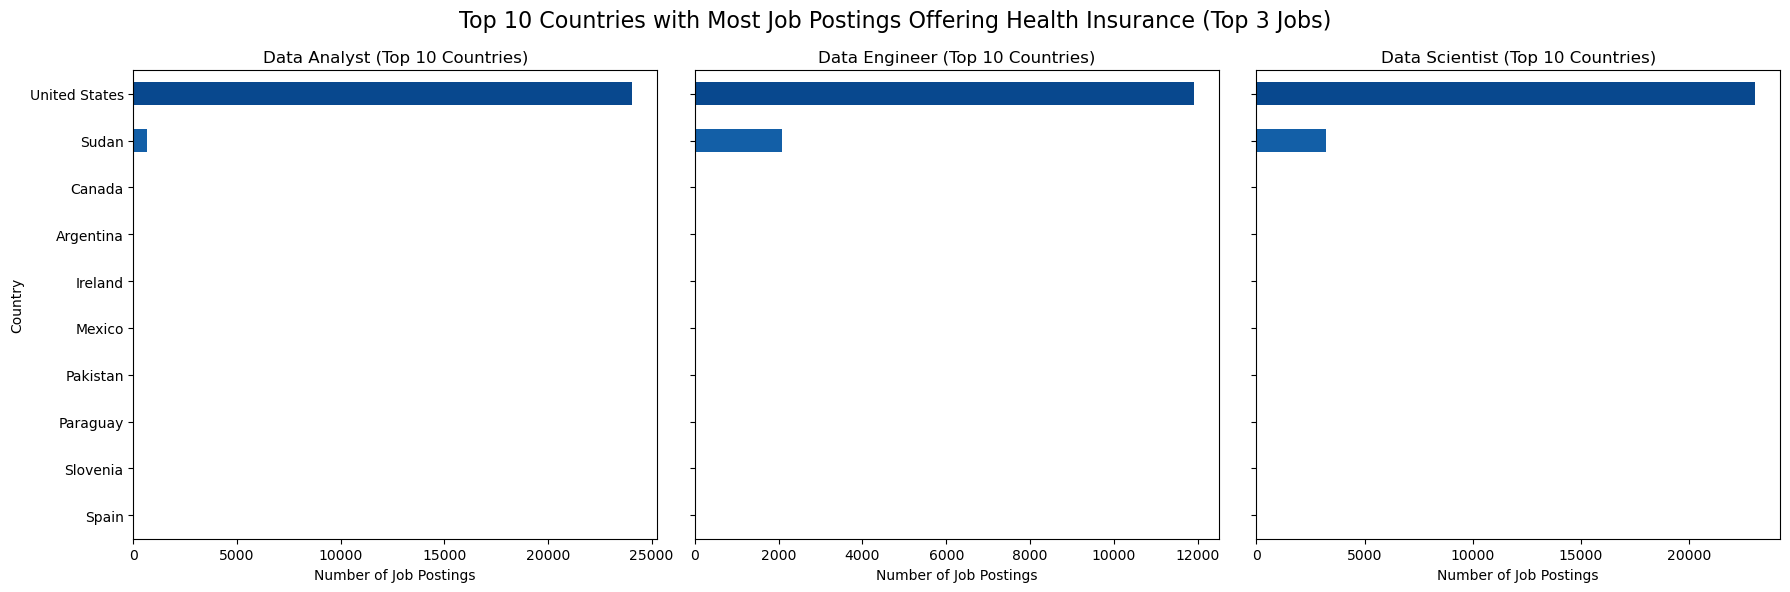

In [72]:
# comparing top 3 jobs along with top 10 countries with health insurance 
top_jobs = df['job_title_short'].value_counts().nlargest(3).index.tolist()

df_top_jobs_insurance = df[
    (df['job_title_short'].isin(top_jobs)) &
    (df['job_health_insurance'] == True)
].copy()

# ✅ fix: take top 10 countries PER job, not overall
df_top_jobs_insurance_country = (
    df_top_jobs_insurance.groupby(['job_title_short', 'job_country'])
    .size()
    .reset_index(name='job_count')
    .sort_values(['job_title_short', 'job_count'], ascending=[True, False])
    .groupby('job_title_short')
    .head(10)
)

# ✅ fix: create 3 subplots (1 for each job)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
colors = sns.color_palette("Blues", n_colors=10)[::-1]

# ✅ fix: loop through jobs and plot separately
for i, job in enumerate(top_jobs):
    df_job = df_top_jobs_insurance_country[
        df_top_jobs_insurance_country['job_title_short'] == job
    ]

    df_job.plot(
        kind='barh',
        x='job_country',
        y='job_count',
        ax=axes[i],
        color=colors,
        legend=False,
        title=f"{job} (Top 10 Countries)"
    )

    axes[i].set_xlabel("Number of Job Postings")
    axes[i].set_ylabel("" if i > 0 else "Country")
    axes[i].invert_yaxis()

fig.suptitle('Top 10 Countries with Most Job Postings Offering Health Insurance (Top 3 Jobs)', fontsize=16)
plt.tight_layout()
plt.show()


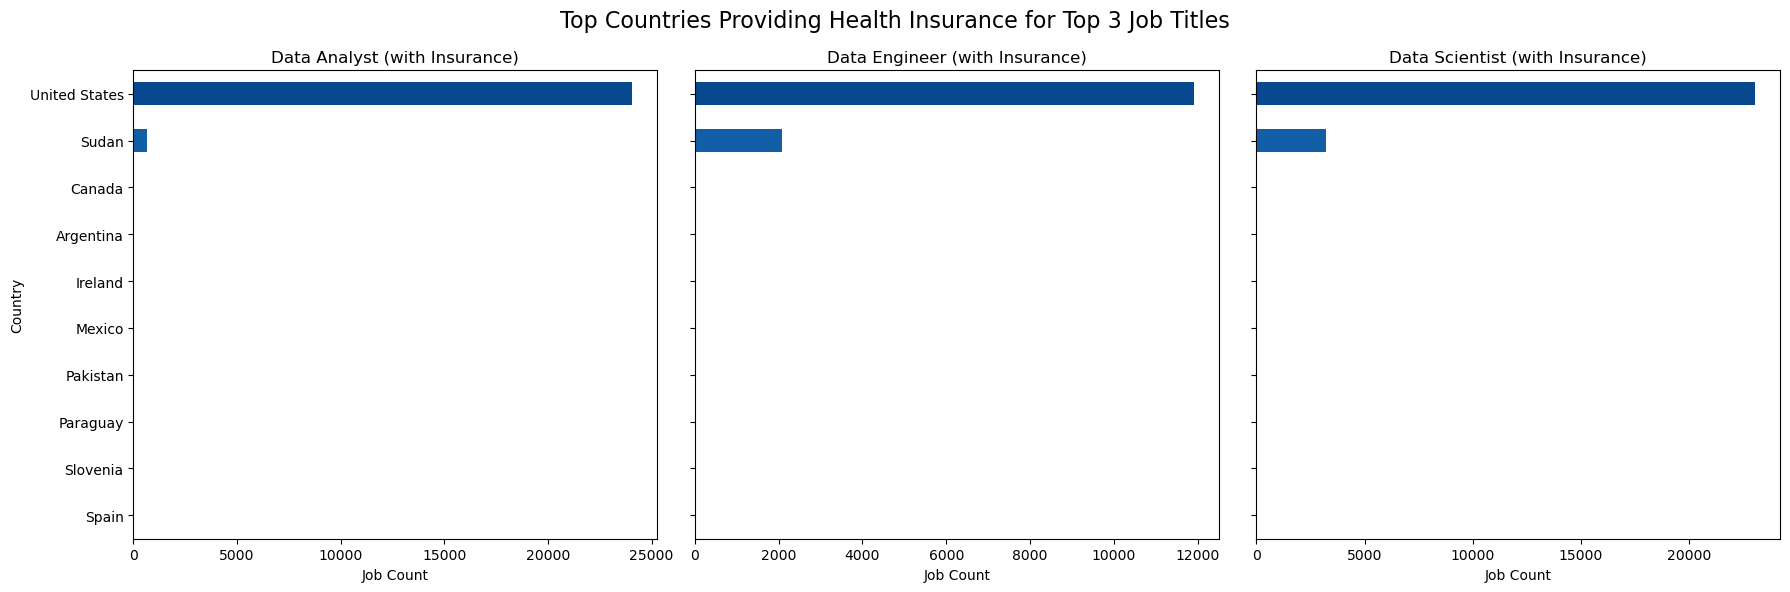

In [66]:


# Step 1: Get top 3 job titles overall
top_jobs = df['job_title_short'].value_counts().head(3).index.tolist()

# Step 2: Create subplots (1 row, 3 cols)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False, sharey=True)

# Step 3: Loop through jobs
for i, job in enumerate(top_jobs):
    df_job = df[
        (df['job_title_short'] == job) &
        (df['job_health_insurance'] == True)
    ]

    df_job_country = (
        df_job.groupby('job_country')
        .size()
        .reset_index(name='job_count')
        .sort_values(by='job_count', ascending=False)
        .head(10)
    )

    # Color gradient (darker for top)
    colors = sns.color_palette("Blues", n_colors=len(df_job_country))[::-1]

    # Plot
    df_job_country.plot(
        kind='barh',
        x='job_country',
        y='job_count',
        ax=axes[i],
        color=colors,
        legend=False,
        title=f"{job} (with Insurance)"
    )

    axes[i].set_xlabel('Job Count')
    axes[i].set_ylabel('' if i > 0 else 'Country')  # only first plot has ylabel
    axes[i].invert_yaxis()

# Main title
fig.suptitle("Top Countries Providing Health Insurance for Top 3 Job Titles", fontsize=16)
plt.tight_layout()
plt.show()



In [73]:
df_Nepal = df[df['job_country'] == 'Nepal'].copy()
df_Nepal

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1746,Data Engineer,Data QA Engineer,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-08-09 14:04:23,True,False,Nepal,None,NaN,NaN,Cedar Gate Services,None,None
2925,Software Engineer,SQL Engineer,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-03-24 14:26:30,True,False,Nepal,None,NaN,NaN,Impetus Incorporation,[sql],{'programming': ['sql']}
21167,Data Analyst,"U-Report Data Analyst Consultant, UNICEF Regio...",Nepal,via UNJoblink Careers,Contractor,False,Nepal,2023-07-17 14:09:19,False,False,Nepal,None,NaN,NaN,United Nations Children's Fund (UNICEF),"[r, python, excel, tableau, flow]","{'analyst_tools': ['excel', 'tableau'], 'other..."
24730,Data Analyst,Data Analytics Manager,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-09-01 14:01:47,True,False,Nepal,None,NaN,NaN,Cedar Gate Services,None,None
26074,Data Analyst,Data Reporting Analyst – Power BI,Anywhere,via LinkedIn Nepal,Full-time,True,Nepal,2023-04-05 13:29:48,False,False,Nepal,None,NaN,NaN,Linkbridge Technologies Pvt. Ltd.,"[power bi, dax]","{'analyst_tools': ['power bi', 'dax']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775260,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-05-29 01:15:23,False,False,Nepal,None,NaN,NaN,Codavatar Tech Pvt. Ltd.,"[python, c++, java, r, sql, hadoop, gdpr]","{'libraries': ['hadoop', 'gdpr'], 'programming..."
776749,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-01-23 05:57:15,False,False,Nepal,None,NaN,NaN,Reputed IT Company,"[sql, t-sql, c#, python, vba, sql server, ssrs]","{'analyst_tools': ['ssrs'], 'databases': ['sql..."
779134,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-01-22 06:13:07,False,False,Nepal,None,NaN,NaN,Reputed Company,"[sql, t-sql, c#, python, vba, sql server, ssrs]","{'analyst_tools': ['ssrs'], 'databases': ['sql..."
779603,Software Engineer,Sr Software Engineer (.Net),"Kathmandu, Nepal",via SmartRecruiters Job Search,Full-time,False,Nepal,2023-01-12 05:42:44,False,False,Nepal,None,NaN,NaN,Verisk,"[c#, javascript, sql, postgresql, aws, asp.net...","{'analyst_tools': ['sharepoint'], 'cloud': ['a..."
